In [79]:
import numpy as np
import pandas as pd                                  # for data wrangling and analysis
import mglearn

import sklearn as sk                                 # for machine learning
from sklearn.model_selection import train_test_split # split data into 75% training & 25% test sets
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt

*<ins>Goals</ins>: To build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new
iris.*

In [80]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: {}".format(iris_dataset.keys()))   
print("Target names: {}".format(iris_dataset['target_names']))   # 3 classes of species
print("Feature names: {}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("Type of target: {}".format(type(iris_dataset['target']))) # target is a one-dimensional array, with one entry per 
                                                                 # flower
print("Target:\n{}".format(iris_dataset['target']))
# print(iris_dataset['DESCR'] + "\n...")                         # short description of dataset

Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
Type of target: <class 'numpy.ndarray'>
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**EDA**

* The three classes seem to be relatively well separated using the sepal and petal measurements.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=100)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


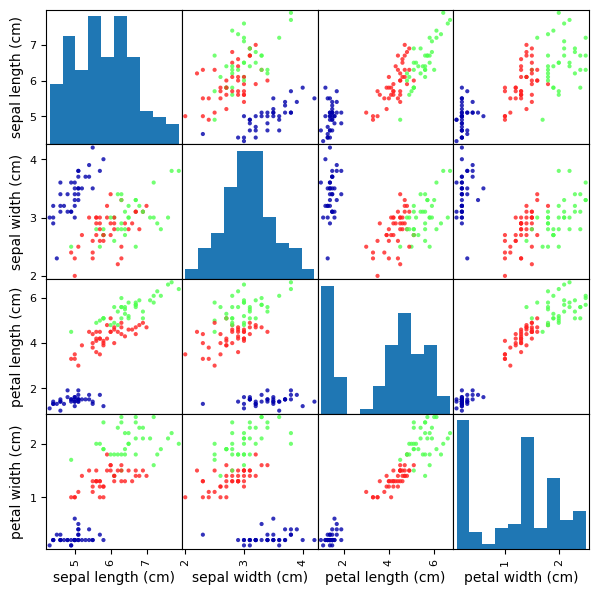

In [89]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'] )

grr = pd.plotting.scatter_matrix(iris_df, 
                                 alpha = 0.8,        # amount of transparency
                                 figsize = (7, 7),
                                 marker = '.',
                                 c = y_train,        # color by types of iris species
                                 cmap = mglearn.cm3) # colormap

**First model: k-Nearest Neighbors**

For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assumptions, we can expect our model to be correct 97% of the time for new irises.

In [96]:
knn = KNeighborsClassifier(n_neighbors=1) # number of neighbors to use by default for kneighbors queries.
knn.fit(X_train, y_train)

# Prediction

X_new = np.array([[5, 2.9, 1, 0.2]])
y_predicted = knn.predict(X_new)
print("The predicted (numeric) output is {0}, so the target name is {1}".format(y_predicted, 
                                                                                iris_dataset['target_names'][y_predicted]))

# Evaluating the Model

y_test_predicted = knn.predict(X_test)
test_set_prediction = pd.DataFrame(X_test, columns = iris_dataset['feature_names'])
test_set_prediction = test_set_prediction.assign(y_test = y_test,
                                                 y_test_predicted = y_test_predicted)
test_set_prediction['dummy'] = np.where(test_set_prediction['y_test'] != test_set_prediction['y_test_predicted'], 1, 0)
display(test_set_prediction)

print("Test set score (using the fraction that species were correctly predicted): {:.2f}".format(np.mean(y_test_predicted == y_test))) 
print("Test set score (the score method of knn): {:.2f}".format(knn.score(X_test, y_test)))


The predicted (numeric) output is [0], so the target name is ['setosa']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_test,y_test_predicted,dummy
0,6.4,2.8,5.6,2.1,2,2,0
1,4.8,3.4,1.6,0.2,0,0,0
2,7.7,2.6,6.9,2.3,2,2,0
3,5.7,4.4,1.5,0.4,0,0,0
4,6.3,2.7,4.9,1.8,2,2,0
5,7.7,3.0,6.1,2.3,2,2,0
6,5.2,4.1,1.5,0.1,0,0,0
7,4.9,3.0,1.4,0.2,0,0,0
8,6.5,3.0,5.5,1.8,2,2,0
9,4.8,3.0,1.4,0.3,0,0,0


Test set score (using the fraction that species were correctly predicted): 0.97
Test set score (the score method of knn): 0.97
